In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import sys
sys.path.append('C:/Users/allen/Google Drive/Python Scripts/AW_modules')
import utilities as util
datadl = __import__('20201224_US_conditions_code')
gc = __import__('202102 global conditions')

%matplotlib notebook

In [2]:
# Data Download
data = datadl.read_data(from_internet=True)

In [3]:
df = gc.oecd_bop_pull('USA')

In [4]:
# GDP
df = data['gdp']
df.columns = ['RGDP', 'PRGDP']

In [5]:
# PCE
pce = data['inflation']
pce.columns = ['Core', 'Headline']
pce = pce.multiply(100)

In [6]:
# Slack
slack = data['slack']

### Domestic Fundamental Conditions

<IPython.core.display.Javascript object>


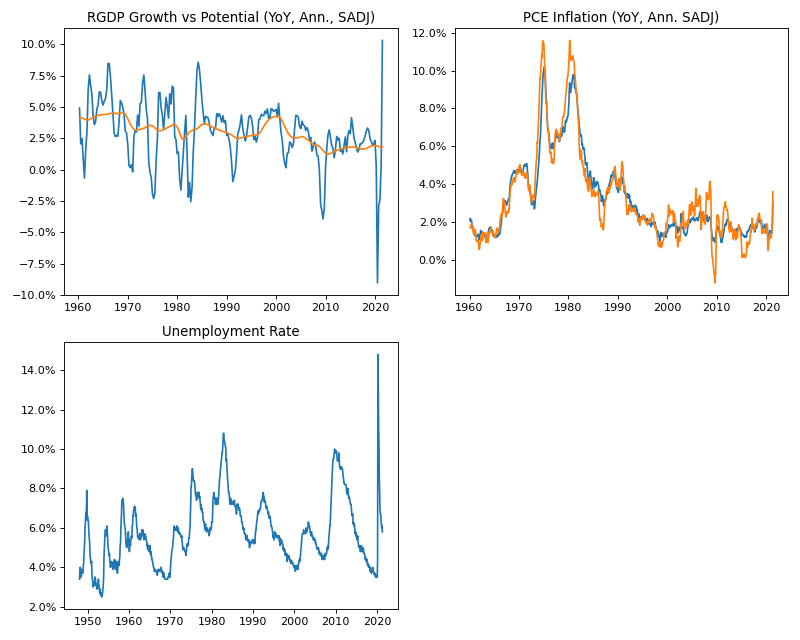

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].plot(df.multiply(100))
ax[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0, 0].set_title('RGDP Growth vs Potential (YoY, Ann., SADJ)')
ax[0, 1].plot(pce)
ax[0, 1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0, 1].set_title('PCE Inflation (YoY, Ann. SADJ)')
ax[1, 0].plot(slack.ue)
ax[1, 0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1, 0].set_title('Unemployment Rate')
ax[1, 1].plot(slack.compPC.pct_change(12).multiply(100))
ax[1, 1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1, 1].set_title('Chg. in Labor Earnings for Work. Age Pop. (YoY)')
plt.tight_layout()
plt.show()

In [8]:
# Credit Creation
cc = data['creditCreation'].multiply(100)
cc['Total'] = cc.totPrivate + cc.centralGovt

In [9]:
# Debt Service Coverage
dsc = data['DSC'].multiply(100)

### Credit Creation and Debt Service

<IPython.core.display.Javascript object>


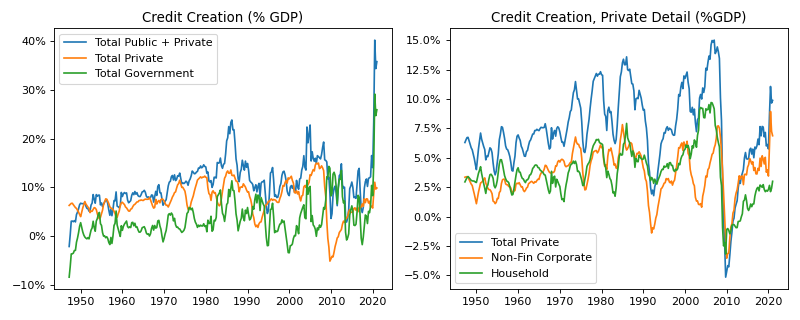

<IPython.core.display.Javascript object>


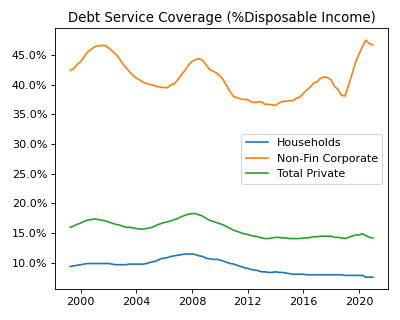

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(cc[['Total', 'totPrivate', 'centralGovt']])
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0].legend(['Total Public + Private', 'Total Private', 'Total Government'])
ax[0].set_title('Credit Creation (% GDP)')

ax[1].plot(cc[['totPrivate', 'nonfin', 'hh']])
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].legend(['Total Private', 'Non-Fin Corporate', 'Household'])
ax[1].set_title('Credit Creation, Private Detail (%GDP)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(dsc)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(['Households', 'Non-Fin Corporate', 'Total Private'])
ax.set_title('Debt Service Coverage (%Disposable Income)')
plt.tight_layout()
plt.show()

In [11]:
# Balance of Payments
bop = gc.oecd_bop_pull('USA').multiply(100).rolling(4).mean()

### External Conditions

<IPython.core.display.Javascript object>


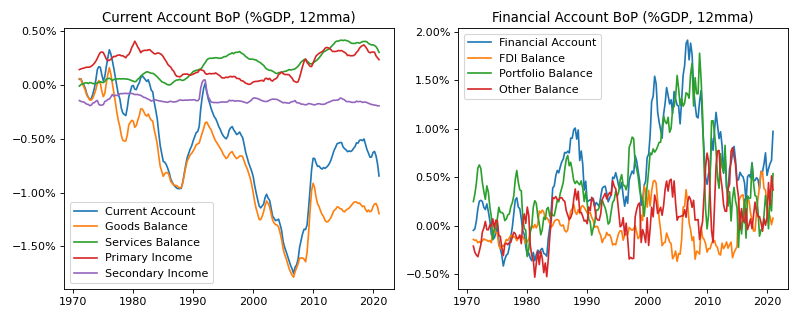

<IPython.core.display.Javascript object>


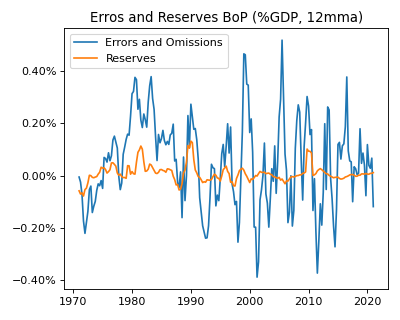

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(bop.loc[:, :'secondary'])
ax[0].legend(['Current Account', 'Goods Balance', 'Services Balance', 'Primary Income', 'Secondary Income'])
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0].set_title('Current Account BoP (%GDP, 12mma)')

ax[1].plot(bop.loc[:, 'financial':'other'])
ax[1].legend(['Financial Account', 'FDI Balance', 'Portfolio Balance', 'Other Balance'])
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].set_title('Financial Account BoP (%GDP, 12mma)')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(bop.loc[:, 'errors':'reserves'])
ax.legend(['Errors and Omissions', 'Reserves'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Erros and Reserves BoP (%GDP, 12mma)')
plt.tight_layout()
plt.show()


In [13]:
mkt = data['mkt'].copy()

stocks = mkt[['spy', 'qqq', 'iwm', 'acwx']].copy()

In [14]:
stocks = stocks.pct_change().add(1).cumprod()
first_date = [stocks[ticker].dropna().index[0] for ticker in ['qqq', 'iwm', 'acwx']]
first_date = dict(zip(['qqq', 'iwm', 'acwx'], first_date))

for ticker in first_date.keys():
    stocks[ticker] = stocks.spy[first_date[ticker]] * stocks[ticker]

### Markets

<IPython.core.display.Javascript object>


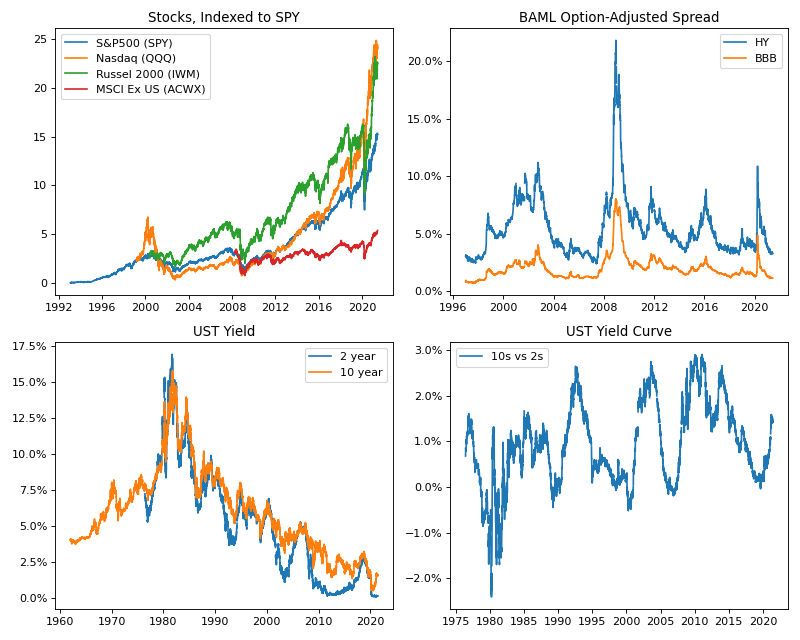

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
ax[0, 0].plot(stocks - 1)
ax[0, 0].legend(['S&P500 (SPY)', 'Nasdaq (QQQ)', 'Russel 2000 (IWM)', 'MSCI Ex US (ACWX)'])
ax[0, 0].set_title('Stocks, Indexed to SPY')

ax[0, 1].plot(mkt[['bamlHY', 'bamlBBB']])
ax[0, 1].legend(['HY', 'BBB'])
ax[0, 1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0, 1].set_title('BAML Option-Adjusted Spread')

ax[1, 0].plot(mkt[['2yr', '10yr']])
ax[1, 0].legend(['2 year', '10 year'])
ax[1, 0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1, 0].set_title('UST Yield')

ax[1, 1].plot(mkt['10yr'] - mkt['2yr'])
ax[1, 1].legend(['10s vs 2s'])
ax[1, 1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1, 1].set_title('UST Yield Curve')
plt.tight_layout()
plt.show()